THIRD AND FINAL STEP:

now we want to turn each poster into an array holding (100,100,3) with RGB values


    We made a loop taking every poster and turning it into a 100,3,3 array using np


now our data is ready for CNN

In [2]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import os

import tensorflow as tf
from tensorflow import keras

In [5]:
data = pd.read_csv("FinalEdit.csv",encoding='latin1')
data

,Unnamed: 0,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,Year
0,9,405296,http://www.imdb.com/title/tt405296,A Scanner Darkly,7.1,Animation,https://images-na.ssl-images-amazon.com/images...,2006
1,13,456554,http://www.imdb.com/title/tt456554,Grandma's Boy,7.0,Comedy,https://images-na.ssl-images-amazon.com/images...,2006
2,14,375154,http://www.imdb.com/title/tt375154,Tristan + Isolde,6.9,Drama,https://images-na.ssl-images-amazon.com/images...,2006
3,15,385726,http://www.imdb.com/title/tt385726,Glory Road,7.2,Biography,https://images-na.ssl-images-amazon.com/images...,2006
4,16,408985,http://www.imdb.com/title/tt408985,Last Holiday,6.4,Comedy,https://images-na.ssl-images-amazon.com/images...,2006
...,...,...,...,...,...,...,...,...
14819,14891,4504438,http://www.imdb.com/title/tt4504438,Dream/Killer,7.5,Documentary,https://images-na.ssl-images-amazon.com/images...,2015
14820,14892,2145909,http://www.imdb.com/title/tt2145909,The Forgotten,5.5,Horror,https://images-na.ssl-images-amazon.com/images...,2014
14821,14893,2320388,http://www.imdb.com/title/tt2320388,Hidden in the Woods,4.1,Thriller,https://images-na.ssl-images-amazon.com/images...,2016
14822,14894,4882174,http://www.imdb.com/title/tt4882174,37,3.9,Drama,https://images-na.ssl-images-amazon.com/images...,2016


In [6]:
genre = []
poster = []

In [7]:
for i in range(len(data)):
    tempImage = Image.open(f"100x100/{data['imdbId'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [8]:
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

14824
100
100
3


In [9]:
len(genre)

14824

In [10]:
poster

[array([[[21, 20, 38],
         [23, 22, 40],
         [26, 25, 43],
         ...,
         [30, 28, 52],
         [34, 32, 56],
         [37, 35, 59]],
 
        [[15, 14, 32],
         [15, 14, 32],
         [16, 15, 33],
         ...,
         [38, 36, 60],
         [33, 31, 55],
         [28, 26, 50]],
 
        [[11,  9, 30],
         [10,  8, 29],
         [ 8,  6, 27],
         ...,
         [39, 37, 59],
         [42, 40, 62],
         [45, 43, 65]],
 
        ...,
 
        [[10,  9, 23],
         [10,  9, 23],
         [ 9,  8, 22],
         ...,
         [ 2,  3,  7],
         [ 3,  4,  8],
         [ 3,  4,  8]],
 
        [[14, 13, 27],
         [14, 13, 27],
         [14, 13, 27],
         ...,
         [ 1,  2,  6],
         [ 2,  3,  7],
         [ 2,  3,  7]],
 
        [[14, 13, 27],
         [15, 14, 28],
         [15, 14, 28],
         ...,
         [ 3,  4,  8],
         [ 4,  5,  9],
         [ 5,  6, 10]]], dtype=uint8),
 array([[[255, 254, 251],
         [255, 2

In [11]:
for i in range(len(poster) -1, 0 ,-1):
    if poster[i].shape != (100,100,3): #some posters didnt have 100,100,3 so we deleted them
        poster.pop(i)
        genre.pop(i)

In [12]:
GenreStrings = []
for i in range(len(genre)):
  if genre[i] not in GenreStrings:
    GenreStrings.append(genre[i])
len(GenreStrings)

25

In [13]:
GenreStrings

['Animation',
 'Comedy',
 'Drama',
 'Biography',
 'Action',
 'Adventure',
 'Crime',
 'Horror',
 'Documentary',
 'Mystery',
 'Thriller',
 'Family',
 'Romance',
 'Fantasy',
 'Sci-Fi',
 nan,
 'Music',
 'Short',
 'Musical',
 'Western',
 'History',
 'Adult',
 'War',
 'Sport',
 'Talk-Show']

In [14]:
for i in range (len(GenreStrings) -1, 0 ,-1): #had a nan value
    if not isinstance(GenreStrings[i], str):
        GenreStrings.pop(i)
GenreStrings

['Animation',
 'Comedy',
 'Drama',
 'Biography',
 'Action',
 'Adventure',
 'Crime',
 'Horror',
 'Documentary',
 'Mystery',
 'Thriller',
 'Family',
 'Romance',
 'Fantasy',
 'Sci-Fi',
 'Music',
 'Short',
 'Musical',
 'Western',
 'History',
 'Adult',
 'War',
 'Sport',
 'Talk-Show']

In [15]:
len(GenreStrings)

24

In [16]:
for i in range(len(genre) - 1 , 0 , -1):
    if genre[i] not in GenreStrings: #genre that has nan value is popped
        genre.pop(i)
        poster.pop(i)

In [17]:
print(len(genre))
print(len(poster))

14769
14769


In [25]:
genreCounter = np.zeros(24, dtype=object)
genreCounter

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=object)

In [26]:
for i in range(len(genre)):
    for j in range(len(GenreStrings)):
        if genre[i] == GenreStrings[j]:
            genreCounter[j]+= 1
genreCounter

array([715, 3388, 3476, 472, 1774, 431, 759, 860, 2221, 80, 186, 69, 47,
       71, 45, 15, 127, 8, 10, 8, 2, 1, 2, 2], dtype=object)

In [27]:
for i in range(len(GenreStrings)):
    print(f"Genre: {GenreStrings[i]} Size: {genreCounter[i]}")

Genre: Animation Size: 715
Genre: Comedy Size: 3388
Genre: Drama Size: 3476
Genre: Biography Size: 472
Genre: Action Size: 1774
Genre: Adventure Size: 431
Genre: Crime Size: 759
Genre: Horror Size: 860
Genre: Documentary Size: 2221
Genre: Mystery Size: 80
Genre: Thriller Size: 186
Genre: Family Size: 69
Genre: Romance Size: 47
Genre: Fantasy Size: 71
Genre: Sci-Fi Size: 45
Genre: Music Size: 15
Genre: Short Size: 127
Genre: Musical Size: 8
Genre: Western Size: 10
Genre: History Size: 8
Genre: Adult Size: 2
Genre: War Size: 1
Genre: Sport Size: 2
Genre: Talk-Show Size: 2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.3)

In [ ]:
y_train

['Comedy',
 'Documentary',
 'Drama',
 'Comedy',
 'Documentary',
 'Documentary',
 'Documentary',
 'Comedy',
 'Comedy',
 'Animation',
 'Biography',
 'Crime',
 'Drama',
 'Documentary',
 'Action',
 'Adventure',
 'Animation',
 'Drama',
 'Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Documentary',
 'Comedy',
 'Biography',
 'Comedy',
 'Documentary',
 'Documentary',
 'Comedy',
 'Animation',
 'Biography',
 'Action',
 'Comedy',
 'Animation',
 'Animation',
 'Comedy',
 'Documentary',
 'Fantasy',
 'Crime',
 'Comedy',
 'Drama',
 'Documentary',
 'Drama',
 'Documentary',
 'Drama',
 'Horror',
 'Documentary',
 'Action',
 'Drama',
 'Animation',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Drama',
 'Horror',
 'Animation',
 'Horror',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Documentary',
 'Comedy',
 'Horror',
 'Documentary',
 'Comedy',
 'Drama',
 'Horror',
 'Action',
 'Drama',
 'Drama',
 'Comedy',
 'Comedy',
 'Comedy',
 'Comedy',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Crime

In [ ]:
y_test

['Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Animation',
 'Comedy',
 'Documentary',
 'Action',
 'Drama',
 'Horror',
 'Comedy',
 'Drama',
 'Documentary',
 'Horror',
 'Documentary',
 'Crime',
 'Animation',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Action',
 'Horror',
 'Action',
 'Drama',
 'Action',
 'Documentary',
 'Horror',
 'Drama',
 'Crime',
 'Biography',
 'Comedy',
 'Biography',
 'Drama',
 'Documentary',
 'Drama',
 'Biography',
 'Biography',
 'Action',
 'Drama',
 'Biography',
 'Drama',
 'Drama',
 'Documentary',
 'Horror',
 'Drama',
 'Action',
 'Drama',
 'Comedy',
 'Comedy',
 'Family',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Drama',
 'Adventure',
 'Drama',
 'Animation',
 'Drama',
 'Crime',
 'Adventure',
 'Comedy',
 'Drama',
 'Crime',
 'Horror',
 'Crime',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Animation',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Drama',
 'Biography',
 'Adventure',
 'Documen

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

10338
10338
4431
4431


In [ ]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (10338, 100, 100, 3)
10338 train samples
4431 test samples


In [ ]:
def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

In [ ]:
y_train = one_hot(y_train)
y_test = one_hot(y_test)
print (y_train)
print (y_train[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print (y_train.shape)
print(y_test.shape)

(10338, 24)
(4431, 20)


In [ ]:
for i in range(len(GenreStrings)): #to make sure that all genres are in training data
    if GenreStrings[i] not in y_train:
        print(GenreStrings[i])
#MAKE SURE THIS DOESN'T PRINT OUT ANYTHING

In [ ]:
for i in range(len(GenreStrings)): # to see what genres are not in test data
    if GenreStrings[i] not in y_test:
        print(GenreStrings[i])

Adult
War
Sport
Talk-Show


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(24, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dropout_1 (Dropout)         (None, 40000)            

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size=128, shuffle=True, validation_split=0.1)

Epoch 1/15
73/73 [==============================] - 98s 1s/step - loss: 2.1480 - accuracy: 0.2681 - val_loss: 2.0456 - val_accuracy: 0.3085
Epoch 2/15
73/73 [==============================] - 76s 1s/step - loss: 1.9821 - accuracy: 0.3238 - val_loss: 1.9987 - val_accuracy: 0.3414
Epoch 3/15
73/73 [==============================] - 74s 1s/step - loss: 1.8577 - accuracy: 0.3602 - val_loss: 2.0267 - val_accuracy: 0.3472
Epoch 4/15
73/73 [==============================] - 68s 928ms/step - loss: 1.6826 - accuracy: 0.4236 - val_loss: 2.1033 - val_accuracy: 0.3230
Epoch 5/15
73/73 [==============================] - 66s 900ms/step - loss: 1.4562 - accuracy: 0.4865 - val_loss: 2.2145 - val_accuracy: 0.3104
Epoch 6/15
73/73 [==============================] - 65s 891ms/step - loss: 1.2516 - accuracy: 0.5552 - val_loss: 2.3024 - val_accuracy: 0.3162
Epoch 7/15
73/73 [==============================] - 66s 905ms/step - loss: 1.0758 - accuracy: 0.6186 - val_loss: 2.4868 - val_accuracy: 0.2911
Epoch 8/

(4431, 24)


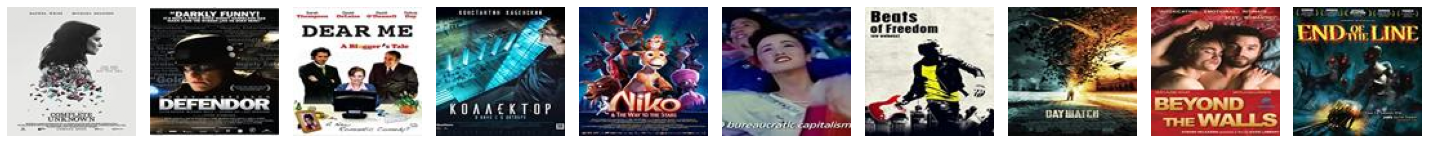

[8.58507771e-03 4.71834664e-06 1.02141695e-02 1.75681617e-02
 1.48704359e-02 1.15136079e-01 1.01971896e-02 2.15542212e-01
 5.81687331e-01 4.52061641e-07 9.01178064e-05 7.38520976e-06
 2.22921111e-02 3.64795801e-06 3.30987359e-06 2.11750716e-03
 3.25697882e-04 1.19155848e-05 4.98797279e-04 1.85551494e-06
 4.75519130e-07 8.39895394e-04 6.28130238e-07 8.78939090e-07]
8
Genre in Movie is Horror,  predicted is Documentary
Genre in Movie is Action,  predicted is Documentary
Genre in Movie is Action,  predicted is Documentary
Genre in Movie is Horror,  predicted is Documentary
Genre in Movie is Drama,  predicted is Documentary
Genre in Movie is Action,  predicted is Documentary
Genre in Movie is Crime,  predicted is Adventure
Genre in Movie is Animation,  predicted is Documentary
Genre in Movie is Horror,  predicted is Adventure
Genre in Movie is Family,  predicted is Documentary


In [ ]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  index = np.argmax(decoded_imgs1[i]) #index of max value 
  print(f"Genre in Movie is {GenreStrings[np.argmax(y_test[i])]},  predicted is {GenreStrings[index]}")

In [ ]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

Y_train (24)  <== 24 Genre Y_train
Y_Test (22) <== 22 Genre


In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.save_weights(checkpoint_path)